In [174]:
%matplotlib inline
import string
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sbn
from altair import Chart, X, Y, Color, Scale
import altair as alt
import requests
import nltk
from nltk.corpus import stopwords 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

matplotlib.style.use('ggplot')


In [76]:
bf = pd.read_csv('Data/beer_train.csv')

In [77]:
bf.head()

index  beer/ABV  beer/beerId  beer/brewerId                  beer/name  \
0  40163       5.0        46634          14338                   Chiostro   
1   8135      11.0         3003            395   Bearded Pat's Barleywine   
2  10529       4.7          961            365       Naughty Nellie's Ale   
3  44610       4.4          429              1            Pilsner Urquell   
4  37062       4.4         4904           1417  Black Sheep Ale (Special)   

                beer/style  review/appearance  review/aroma  review/overall  \
0     Herbed / Spiced Beer                4.0           4.0             4.0   
1      American Barleywine                4.0           3.5             3.5   
2  American Pale Ale (APA)                3.5           4.0             3.5   
3           Czech Pilsener                3.0           3.0             2.5   
4         English Pale Ale                4.0           3.0             3.0   

   review/palate  review/taste  \
0            4.0           4.0   
1            3.5           3.0   
2            3.5           3.5   
3            3.0           3.0   
4            3.5           2.5   

                                         review/text  \
0  Pours a clouded gold with a thin white head. N...   
1  12oz bottle into 8oz snifter.\t\tDeep ruby red...   
2  First enjoyed at the brewpub about 2 years ago...   
3  First thing I noticed after pouring from green...   
4  A: pours an amber with a one finger head but o...   

                                   review/timeStruct  review/timeUnix  \
0  {'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...       1229398690   
1  {'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...       1218238738   
2  {'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...       1101492422   
3  {'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...       1308532025   
4  {'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...       1299912708   

   user/ageInSeconds user/birthdayRaw  user/birthdayUnix user/gender  \
0                NaN              NaN                NaN         NaN   
1                NaN              NaN                NaN         NaN   
2                NaN              NaN                NaN        Male   
3       1.209827e+09     Aug 10, 1976        208508400.0        Male   
4                NaN              NaN                NaN         NaN   

  user/profileName  
0       RblWthACoz  
1          BeerSox  
2       mschofield  
3        molegar76  
4       Brewbro000

In [78]:
bf.isna().any()

index                False
beer/ABV             False
beer/beerId          False
beer/brewerId        False
beer/name            False
beer/style           False
review/appearance    False
review/aroma         False
review/overall       False
review/palate        False
review/taste         False
review/text           True
review/timeStruct    False
review/timeUnix      False
user/ageInSeconds     True
user/birthdayRaw      True
user/birthdayUnix     True
user/gender           True
user/profileName      True
dtype: bool

In [79]:
len(bf)

37500

In [74]:
#bf.dropna(inplace=True)
#len(bf)

7709

In [87]:
len(bf[bf['review/text'].isna()])

10

In [4]:
bf'beer/style'].unique()

array(['Herbed / Spiced Beer', 'American Barleywine',
       'American Pale Ale (APA)', 'Czech Pilsener', 'English Pale Ale',
       'Russian Imperial Stout', 'American Wild Ale', 'Pumpkin Ale',
       'English Barleywine', 'American IPA', 'Scotch Ale / Wee Heavy',
       'American Double / Imperial Stout', 'Euro Pale Lager',
       'Maibock / Helles Bock', 'American Amber / Red Ale', 'Rye Beer',
       'American Double / Imperial IPA', 'MÃ¤rzen / Oktoberfest',
       'Fruit / Vegetable Beer', 'Witbier', 'Light Lager', 'Rauchbier',
       'American Porter', 'Hefeweizen',
       'Extra Special / Strong Bitter (ESB)', 'Wheatwine',
       'English Strong Ale', 'Braggot', 'Euro Strong Lager',
       'Munich Helles Lager', 'English India Pale Ale (IPA)', 'Altbier',
       'Doppelbock', 'American Brown Ale', 'Munich Dunkel Lager',
       'Irish Dry Stout', 'KÃ¶lsch', 'Foreign / Export Stout',
       'Cream Ale', 'Lambic - Unblended', 'Scottish Ale', 'Baltic Porter',
       'Belgian IPA', 'Ol

In [18]:
bf.groupby('beer/style', as_index=False)['review/overall'].agg({'review/overall':'mean', 'review/aroma':'count'}).sort_values('review/overall', ascending=False)

beer/style  review/overall  review/aroma
11  American Double / Imperial Stout        4.326919          4495
41                English Barleywine        4.233333            90
64        Keller Bier / Zwickel Bier        4.184211            19
81            Russian Imperial Stout        4.168061          2032
82                          Rye Beer        4.162362          1355
74               Munich Helles Lager        4.096115           489
44             English Dark Mild Ale        4.062500            16
21                     Baltic Porter        4.047030           404
12                      American IPA        4.045082          3050
20                 American Wild Ale        4.040000            75
17                   American Porter        4.026675          1687
26           Belgian Strong Pale Ale        3.959459           444
76                     Oatmeal Stout        3.958333            72
29                       Black & Tan        3.953608            97
23                       Belgian IPA        3.953125            96
36                        Doppelbock        3.937220           669
85            Scotch Ale / Wee Heavy        3.918659          2133
27                Berliner Weissbier        3.916667             6
77                           Old Ale        3.905492           783
4                American Barleywine        3.888801           634
66                           KÃ¶lsch        3.883117            77
33                        Chile Beer        3.875000             8
59                   German Pilsener        3.872222           450
80                         Rauchbier        3.870383          1462
9     American Double / Imperial IPA        3.869255          2872
92                         Wheatwine        3.827988           343
24                  Belgian Pale Ale        3.823810           105
5                 American Black Ale        3.822115           104
7                 American Brown Ale        3.817623           244
72                Milk / Sweet Stout        3.811321            53
..                               ...             ...           ...
55                Flanders Oud Bruin        3.562500             8
58            Fruit / Vegetable Beer        3.562194          1021
84                       Schwarzbier        3.550000            40
3         American Amber / Red Lager        3.543478            23
93                     Winter Warmer        3.519802           202
19               American Strong Ale        3.507752           129
37         Dortmunder / Export Lager        3.500000            22
16           American Pale Wheat Ale        3.500000           116
45      English India Pale Ale (IPA)        3.500000           123
56                  Flanders Red Ale        3.500000             2
61              Herbed / Spiced Beer        3.451613            62
57            Foreign / Export Stout        3.431818            44
79                  Quadrupel (Quad)        3.404762            84
6                American Blonde Ale        3.386029           272
15               American Pale Lager        3.347368            95
30                              Bock        3.320388           103
22                  Belgian Dark Ale        3.284615           130
88                       Smoked Beer        3.277778            45
91                        Weizenbock        3.277778             9
1             American Adjunct Lager        3.194118           170
52                   Euro Pale Lager        3.144636           522
34                         Cream Ale        3.115385            52
68                Lambic - Unblended        3.071429             7
32    California Common / Steam Beer        3.071429             7
65                     Kristalweizen        3.000000             6
63                     Irish Red Ale        2.984615            65
53                 Euro Strong Lager        2.950787           254
70                  Low Alcohol Beer        2.928571             7
69    

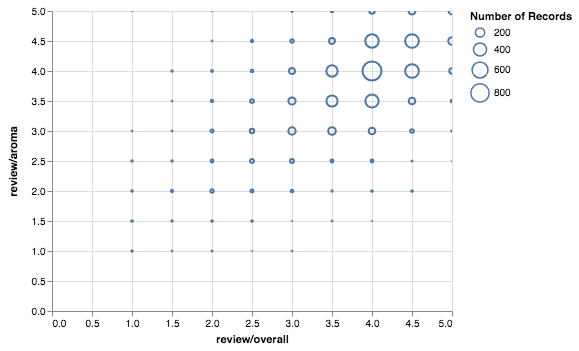

In [89]:
alt.Chart(bf.sample(5000)).mark_point().encode(x='review/overall',y='review/aroma', size='count()').interactive()

In [43]:
cm = bf[['review/appearance','review/overall','review/palate', 'review/taste', 'beer/ABV']].corr()
cm

review/appearance  review/overall  review/palate  \
review/appearance           1.000000        0.498733       0.555833   
review/overall              0.498733        1.000000       0.697220   
review/palate               0.555833        0.697220       1.000000   
review/taste                0.531676        0.785220       0.732092   
beer/ABV                    0.288376        0.197005       0.350656   

                   review/taste  beer/ABV  
review/appearance      0.531676  0.288376  
review/overall         0.785220  0.197005  
review/palate          0.732092  0.350656  
review/taste           1.000000  0.354033  
beer/ABV               0.354033  1.000000

In [44]:
cm.reset_index(inplace=True)
cm = cm.melt(id_vars='index', value_vars=['review/appearance','review/overall','review/palate', 'review/taste', 'beer/ABV'], value_name='corr', var_name='attribute')


In [45]:
cm.head()

index          attribute      corr
0  review/appearance  review/appearance  1.000000
1     review/overall  review/appearance  0.498733
2      review/palate  review/appearance  0.555833
3       review/taste  review/appearance  0.531676
4           beer/ABV  review/appearance  0.288376

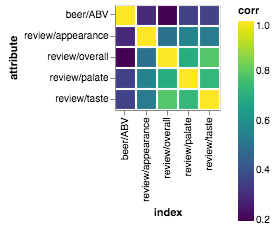

In [49]:
alt.Chart(cm).mark_rect().encode(x='index',y='attribute',color='corr')


In [71]:
bf.groupby('beer/beerId').agg({'review/overall':'mean', 'review/taste':'count'})


review/overall  review/taste
beer/beerId                              
175                3.544643            56
176                3.858696            92
178                3.477941            68
429                3.834741           947
436                2.752174           345
454                4.142857            21
503                4.000000             1
505                4.211538            26
507                4.275862            29
508                3.500000             2
510                4.160714            28
511                3.916667             6
512                3.863636            22
513                3.863636            44
514                3.775000            20
515                4.022727            44
562                4.400000             5
563                4.000000             1
638                4.214286             7
727                3.839098           665
798                2.200000            55
959                3.731481            54
960                3.863636           154
961                3.634615            78
962                3.702055           146
963                3.894366            71
965                3.150000            10
966                4.050971           206
967                3.000000             2
1018               3.769841           252
...                     ...           ...
75907              4.090909            11
75940              3.500000             1
75963              3.000000             1
75988              4.000000             2
75989              3.500000             1
76111              4.000000             1
76229              4.250000             2
76265              3.250000             2
76417              3.500000             1
76453              4.000000             1
76506              4.000000             1
76508              4.000000             1
76560              3.666667             3
76668              4.000000             1
76685              4.000000             1
76694              3.250000             2
76696              4.500000             3
76766              3.500000             1
76780              4.500000             1
76810              4.166667             3
76963              4.000000             1
76995              4.500000             2
76996              3.750000             2
76997              3.750000             2
76998              4.500000             1
76999              4.500000             1
77116              4.000000             1
77198              4.000000             1
77199              3.500000             1
77207              5.000000             1

[1731 rows x 2 columns]

Try a regression using just taste

1. Split the data into training and test
2. train the model
    1. training tries to find the coefficient that minimizes the MSE
    2. Lets look at that in Google Sheets with Solver
    3. Lets take our first look at scikit-learn

3. make predictions on the test
4. calculate the error.
    1. MAE
    1. MSE
    
5. Improving the model
    1. Use more variables such as appearance, pallete and ABV
    2. Normalize!

6. The real challenge is to use the text of the review.
    1. turning text into numeric data
    2. what to look for?
    3. What is one-hot encoding?
    
    

## Exploratory analysis of the review text

In [126]:
bf['review/text'] = bf['review/text'].str.lower()

In [127]:
bf.loc[:5,'review/text']

0    pours a clouded gold with a thin white head  n...
1    12oz bottle into 8oz snifter \t\tdeep ruby red...
2    first enjoyed at the brewpub about 2 years ago...
3    first thing i noticed after pouring from green...
4    a  pours an amber with a one finger head but o...
5    served in a snifter  on tap at cbc \t\tcolor i...
Name: review/text, dtype: object

In [128]:
import string
bf['review/text'] = bf['review/text'].str.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))


In [129]:
bf['text_list'] = bf['review/text'].str.split()

In [130]:
from  collections import Counter

In [131]:
bf.dropna(inplace=True, subset=['text_list'])

In [158]:
sw = set(stopwords.words('english'))
[sw.add(x) for x in ['beer','taste','head']]
c = Counter()
[bf['review/overall'] > 4.5]
_ = bf.text_list.map(lambda x  : c.update([y for y in x if y not in sw]))


Looking at common words, and looking for flavor based or descriptive words

In [162]:
c.most_common(500)[-25:]

[('slick', 997),
 ('liquid', 997),
 ('fan', 991),
 ('green', 989),
 ('toasty', 987),
 ('heat', 986),
 ('woody', 985),
 ('silky', 984),
 ('colour', 980),
 ('cold', 979),
 ('settles', 976),
 ('kick', 976),
 ('due', 976),
 ('towards', 974),
 ('initial', 964),
 ('sort', 959),
 ('base', 958),
 ('summer', 957),
 ('viscous', 957),
 ('biscuit', 957),
 ('raisins', 950),
 ('hoppiness', 947),
 ('part', 947),
 ('must', 944),
 ('bold', 943)]

In [150]:
bf[bf['review/text'].str.contains('horrible')]['review/overall'].describe()

count    124.000000
mean       2.907258
std        0.965601
min        1.000000
25%        2.500000
50%        3.000000
75%        3.500000
max        5.000000
Name: review/overall, dtype: float64

In [164]:
bf.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName', 'revew/text',
       'text_list'],
      dtype='object')

In [166]:
beer_X = bf[['review/overall']]
beer_y = bf[['review/taste']]
train_X, test_X, train_y, test_y = train_test_split(beer_X, beer_y)

In [170]:
rmodel = LinearRegression()
rmodel.fit(train_X.values, train_y.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [173]:
preds = rmodel.predict(test_X)

In [177]:
abs(preds-test_y).mean()

review/taste    0.327824
dtype: float64